<a href="https://colab.research.google.com/github/FerreiraJean018/Sea_Level_Predictor/blob/main/Sea_Level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

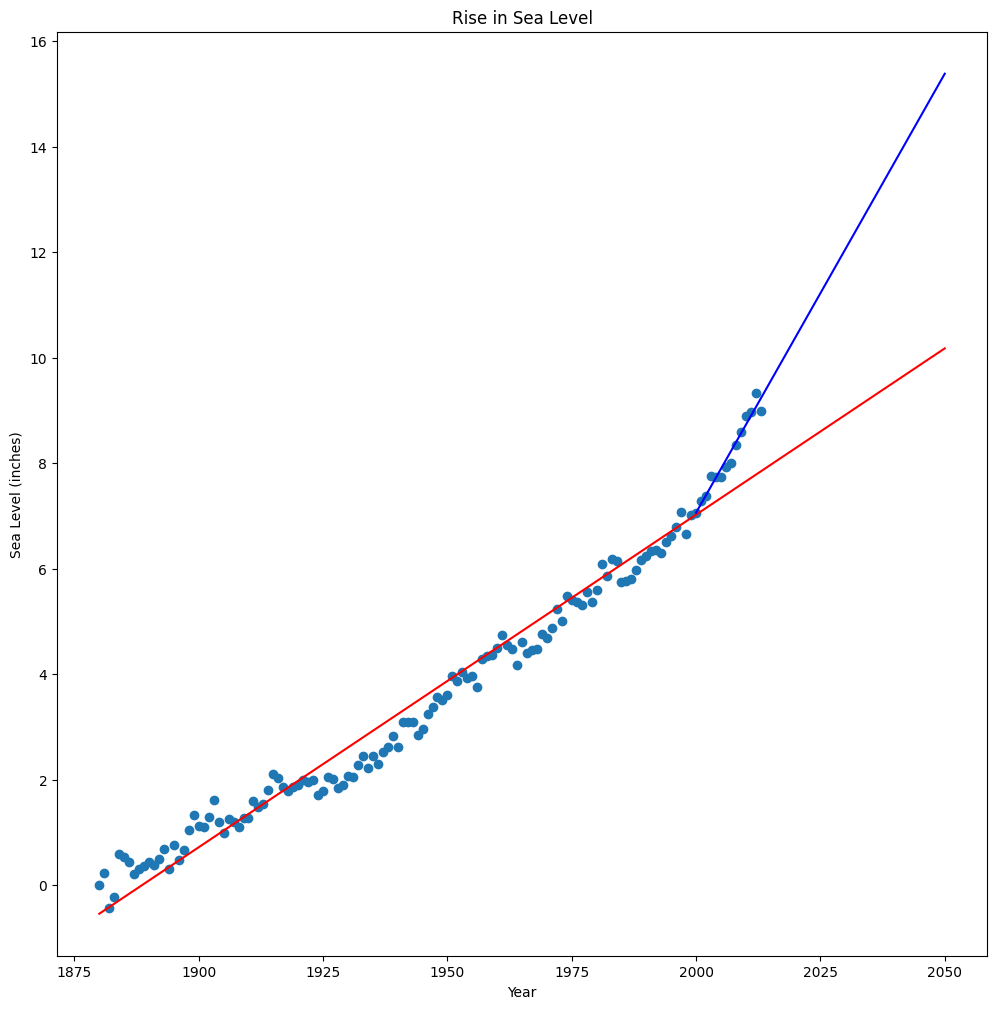

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    df = pd.read_csv('epa-sea-level.csv')
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.plot(x, y, 'o', label='Orginal data')



    # Create first line of best fit
    res = linregress(x, y)
    x_regress = pd.Series(np.arange(1880, 2051, 1))
    y_predict = res.intercept + res.slope*x_regress
    plt.plot(x_regress, y_predict, 'r-', label='first fitted line (1880 - 2050)')


    # Create second line of best fit
    df_recent = df.copy()
    df_recent = df_recent[df_recent['Year'] >= 2000]
    new_x = df_recent['Year']
    new_y = df_recent['CSIRO Adjusted Sea Level']

    new_res = linregress(new_x, new_y)
    new_xregress = pd.Series(np.arange(2000, 2051, 1))
    new_ypredict = new_res.intercept + new_res.slope*new_xregress
    plt.plot(new_xregress, new_ypredict, 'b-')


    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot()
